In [2]:
import quandl
quandl.ApiConfig.api_key = "KxKMd8dsHx1sWnaGj6_U"
import numpy as np
import matplotlib as plt
import pandas as pd
import keras
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [3]:
def get_monthly_close_prices_ticker(ticker,start_date,end_date):
    
    df = quandl.get_table('SHARADAR/SEP',ticker=ticker,date={'gte':start_date,'lte':end_date}, qopts={'columns':['ticker','date','close']},paginate=True).fillna(value=0)
    close = df.pivot(index='date', columns='ticker', values='close')
    monthly = close.resample('M').apply(lambda x: x[-1])
    #.agg(lambda x: x[-1])
    return monthly

In [4]:
monthly_prices = get_monthly_close_prices_ticker('A','2009-13-31','2019-01-01')

In [5]:
#monthly_prices

In [6]:
#quandl.get_table('SHARADAR/SEP',date={'gte':'2018-06-30','lte':'2019-01-01'}, qopts={'columns':['ticker','date','close']},paginate=True).fillna(value=0)

In [7]:
def get_monthly_returns(monthly_prices):
    """
    Compute returns for each ticker and date in close.
    
    Parameters
    ----------
    close : DataFrame
        Close prices for each ticker and date
    
    Returns
    -------
    returns : DataFrame
        Returns for each ticker and date
    """
        

    #.agg(lambda x: x[-1])
    monthly_returns = (monthly_prices - monthly_prices.shift(1))/monthly_prices.shift(1).fillna(value=0)
    
    
    return monthly_returns

In [8]:
df1 = get_monthly_returns(monthly_prices)


In [9]:
df1.head()

ticker,A
date,
2010-01-31,NaN
2010-02-28,0.122369
2010-03-31,0.093134
2010-04-30,0.054376
2010-05-31,-0.107557


In [10]:
df1 = df1.iloc[ 1: , : ]

In [11]:
df1.reset_index(inplace=True)


In [12]:
df1.head()

ticker,date,A
0,2010-02-28,0.122369
1,2010-03-31,0.093134
2,2010-04-30,0.054376
3,2010-05-31,-0.107557
4,2010-06-30,-0.121446


In [13]:
def get_factor_data_ticker(ticker,start_date,end_date):
    
    df = quandl.get_table('SHARADAR/SF1',ticker=ticker,dimension='ARQ',calendardate={'gte':start_date, 'lte':end_date}, paginate=True).fillna(value=0)

    
    return df

In [14]:
df2 = get_factor_data_ticker('A','2009-13-31','2019-01-01')

In [15]:
df2.head()

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
None,,,,,,,,,,,,,,,,,,,,,
0,A,ARQ,2018-12-31,2019-03-05,2019-01-31,2019-03-05,-381000000,8952000000,0,3712000000,...,317515869,318000000,322000000,4.038,5253000000,0,-256000000,0,16.519,2617000000
1,A,ARQ,2018-09-30,2018-12-20,2018-10-31,2019-03-05,-408000000,8541000000,0,3848000000,...,318533054,318000000,322000000,4.069,5077000000,0,49000000,0,15.965,2677000000
2,A,ARQ,2018-06-30,2018-08-30,2018-07-31,2019-03-05,-335000000,8349000000,0,3667000000,...,318769547,320000000,324000000,3.759,4901000000,0,6000000,0,15.316,2653000000
3,A,ARQ,2018-03-31,2018-05-31,2018-04-30,2019-03-05,-310000000,8784000000,0,4525000000,...,319952126,322000000,326000000,3.745,5852000000,0,22000000,0,18.174,3160000000
4,A,ARQ,2017-12-31,2018-03-06,2018-01-31,2019-03-05,-269000000,8698000000,0,4397000000,...,322476579,323000000,323000000,3.749,5724000000,0,553000000,0,17.721,3036000000


In [16]:
df2['calendardate'] = pd.to_datetime(df2['calendardate']).dt.strftime("%Y-%m-%d")


In [17]:
def add_returns(row, df):
    c_date = row['calendardate']
    ticker = row['ticker']
    result = 0.0
    value = df.loc[df['date'] == c_date]
    if not value.empty:
        if ticker in value.columns:
            result = value[ticker].values[0]
    return result
df2['results'] = df2.apply(lambda row: add_returns(row, df1), axis=1)

In [18]:
df2.sort_values('calendardate')

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital,results
None,,,,,,,,,,,,,,,,,,,,,
35,A,ARQ,2010-03-31,2010-06-07,2010-04-30,2019-03-05,-239000000,7767000000,0,5712000000,...,348000000,354000000,3.652,6997000000,0,31000000,0,20.106,3003000000,0.093134
34,A,ARQ,2010-06-30,2010-09-07,2010-07-31,2019-03-05,-225000000,9100000000,0,5735000000,...,347000000,352000000,3.988,7188000000,0,22000000,0,20.715,2818000000,-0.121446
33,A,ARQ,2010-09-30,2010-12-20,2010-10-31,2019-03-05,-88000000,9696000000,0,6169000000,...,344000000,356000000,4.581,7746000000,0,-49000000,0,22.517,3086000000,0.237301
32,A,ARQ,2010-12-31,2011-03-09,2011-01-31,2019-03-05,-63000000,8044000000,0,4598000000,...,347000000,355000000,4.378,6129000000,0,5000000,0,17.663,3192000000,0.183038
31,A,ARQ,2011-03-31,2011-06-07,2011-04-30,2019-03-05,278000000,8649000000,0,5096000000,...,347000000,355000000,4.833,6601000000,0,60000000,0,19.023,3504000000,0.064163
30,A,ARQ,2011-06-30,2011-09-07,2011-07-31,2019-03-05,271000000,8753000000,0,5223000000,...,348000000,357000000,4.859,6711000000,0,-49000000,0,19.284,3718000000,0.024865
29,A,ARQ,2011-09-30,2011-12-16,2011-10-31,2019-03-05,116000000,9057000000,0,5569000000,...,347000000,355000000,4.980,7061000000,0,4000000,0,20.349,3732000000,-0.152427
28,A,ARQ,2011-12-31,2012-03-05,2012-01-31,2019-03-05,87000000,9099000000,0,5715000000,...,348000000,352000000,4.698,7087000000,0,26000000,0,20.365,4010000000,-0.068533
27,A,ARQ,2012-03-31,2012-06-04,2012-04-30,2019-03-05,68000000,9413000000,0,6010000000,...,348000000,354000000,4.980,7422000000,0,38000000,0,21.328,4175000000,0.020403


In [19]:
corr_matrix = df2.corr().abs()

In [20]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [21]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [22]:
df2 = df2.drop(df2[to_drop], axis=1)

In [23]:
df2.shape

(36, 72)

In [24]:
dataset = df2.set_index('calendardate')




In [25]:
df_numbers = dataset.drop(columns=['ticker','dimension','reportperiod','lastupdated','datekey'])

In [ ]:
df_numbers = df_numbers.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by=None)

In [106]:
pd.options.display.max_columns = None
display(df_numbers)

,accoci,assets,assetsavg,assetsc,assetsnc,assetturnover,bvps,capex,cashneq,cor,consolinc,currentratio,de,debt,debtc,debtnc,depamor,deposits,divyield,dps,ebit,ebitdamargin,equityavg,ev,evebit,evebitda,fcf,fxusd,grossmargin,intexp,invcapavg,investments,investmentsc,liabilities,liabilitiesc,liabilitiesnc,ncf,ncfbus,ncfcommon,ncfdebt,ncfdiv,ncff,ncfi,ncfinv,ncfx,netincdis,netincnci,opinc,payables,pb,pe,prefdivis,ps,retearn,roa,roe,roic,ros,sbcomp,sharefactor,sharesbas,taxassets,taxexp,taxliabilities,workingcapital,results
calendardate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-31,-381000000,8952000000,0,3712000000,5240000000,0,15.836,-39000000,2057000000,577000000,504000000,3.390,0.778,1798000000,0,1798000000,54000000,0,0.008,0.164,266000000,0.249,0,25183546583,24,20.195,174000000,1.0,0.551,18000000,0,77000000,0,3916000000,1095000000,2821000000,-190000000,-248000000,-53000000,0,-52000000,-122000000,-290000000,-1000000,9000000,0,0,250000000,315000000,5.052,22.318,0,5.102,90000000,0,0,0,0,24000000,1.0,317515869,0,-256000000,0,2617000000,-0.067588
2018-09-30,-408000000,8541000000,0,3848000000,4693000000,0,14.362,-35000000,2247000000,585000000,195000000,3.286,0.869,1799000000,0,1799000000,56000000,0,0.009,0.149,262000000,0.246,0,20317169790,20,16.505,337000000,1.0,0.548,18000000,0,68000000,0,3970000000,1171000000,2799000000,-432000000,-79000000,-83000000,0,-47000000,-131000000,-114000000,1000000,-11000000,0,0,249000000,340000000,4.547,65.713,0,4.226,-336000000,0,0,0,0,14000000,1.0,318533054,0,49000000,0,2677000000,0.044418
2018-06-30,-335000000,8349000000,0,3667000000,4682000000,0,14.262,-33000000,2131000000,542000000,236000000,3.616,0.828,1799000000,0,1799000000,53000000,0,0.009,0.149,260000000,0.260,0,21108439731,21,17.431,164000000,1.0,0.549,18000000,0,70000000,0,3781000000,1014000000,2767000000,0,-430000000,-226000000,-315000000,-48000000,-589000000,-473000000,-10000000,-15000000,0,0,225000000,273000000,4.698,71.948,0,4.458,-416000000,0,0,0,0,13000000,1.0,318769547,0,6000000,0,2653000000,-0.001292
2018-03-31,-310000000,8784000000,0,4525000000,4259000000,0,14.326,-48000000,3011000000,562000000,205000000,3.315,0.903,2115000000,315000000,1800000000,50000000,0,0.009,0.149,246000000,0.245,0,18915435642,20,16.292,255000000,1.0,0.534,19000000,0,139000000,0,4167000000,1365000000,2802000000,-208000000,-1000000,-35000000,-30000000,-48000000,-114000000,-50000000,-2000000,-15000000,0,0,215000000,271000000,4.295,83.593,0,4.197,-412000000,0,0,0,0,12000000,1.0,319952126,0,22000000,0,3160000000,-0.024639
2017-12-31,-269000000,8698000000,0,4397000000,4301000000,0,14.000,-60000000,2887000000,538000000,-320000000,3.231,0.923,2145000000,345000000,1800000000,51000000,0,0.008,0.149,253000000,0.251,0,21221879796,23,18.780,155000000,1.0,0.556,20000000,0,140000000,0,4172000000,1361000000,2811000000,209000000,-6000000,-22000000,135000000,-48000000,37000000,-67000000,-1000000,24000000,0,0,239000000,292000000,4.857,112.061,0,4.758,-529000000,0,0,0,0,31000000,1.0,322476579,0,553000000,0,3036000000,-0.032785
2017-09-30,-346000000,8426000000,0,4169000000,4257000000,0,15.003,-58000000,2678000000,542000000,177000000,3.301,0.743,2011000000,210000000,1801000000,52000000,0,0.008,0.132,246000000,0.251,0,21143177183,24,19.326,230000000,1.0,0.544,20000000,0,138000000,0,3591000000,1263000000,2328000000,389000000,0,8000000,-70000000,-43000000,-106000000,-60000000,-2000000,-7000000,0,0,233000000,305000000,4.515,31.886,0,4.877,-126000000,0,0,0,0,12000000,1.0,323018027,0,49000000,0,2906000000,-0.008035
2017-06-30,-417000000,8261000000,0,3996000000,4265000000,0,14.355,-43000000,2563000000,518000000,175000000,3.220,0.792,2081000000,280000000,1801000000,51000000,0,0.008,0.132,212000000,0.236,0,20343490074,25,19.906,185000000,1.0,0.535,19000000,0,137000000,0,3650000000,1241000000,2409000000,0,-57000000,32000000,39000000,-42000000,29000000,-101000000,-1000000,18000000,0,0,201000000,289000000,4.519,32.900,0,4.740,-260000000,0,0,0,0,13000000,1.0,3218

In [27]:
df_numbers.shape

(36, 66)

In [28]:
#df_numbers[:36]

In [29]:
dataset = df_numbers.values
dataset

array([[-3.81000000e+08,  8.95200000e+09,  0.00000000e+00, ...,
         0.00000000e+00,  2.61700000e+09, -6.75881133e-02],
       [-4.08000000e+08,  8.54100000e+09,  0.00000000e+00, ...,
         0.00000000e+00,  2.67700000e+09,  4.44181226e-02],
       [-3.35000000e+08,  8.34900000e+09,  0.00000000e+00, ...,
         0.00000000e+00,  2.65300000e+09, -1.29198966e-03],
       ...,
       [-8.80000000e+07,  9.69600000e+09,  0.00000000e+00, ...,
         0.00000000e+00,  3.08600000e+09,  2.37300704e-01],
       [-2.25000000e+08,  9.10000000e+09,  0.00000000e+00, ...,
         0.00000000e+00,  2.81800000e+09, -1.21446230e-01],
       [-2.39000000e+08,  7.76700000e+09,  0.00000000e+00, ...,
         0.00000000e+00,  3.00300000e+09,  9.31341386e-02]])

In [30]:
#dataset
36 * 0.9

32.4

train = dataset[0:32,:]
valid = dataset[32:,:]


valid.shape

train_data = dataset[:32]
test_data = dataset[32:]

train_targets = train_data[:,-1]

scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)



In [31]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [32]:
dataset.shape

(36, 66)

In [33]:
dataset

array([[0.15620999, 0.45059603, 0.        , ..., 0.        , 0.24148004,
        0.21768849],
       [0.12163892, 0.34172185, 0.        , ..., 0.        , 0.27069133,
        0.5050843 ],
       [0.21510883, 0.29086093, 0.        , ..., 0.        , 0.25900682,
        0.38779713],
       ...,
       [0.53137004, 0.64768212, 0.        , ..., 0.        , 0.469815  ,
        1.        ],
       [0.35595391, 0.48980132, 0.        , ..., 0.        , 0.33933788,
        0.07949443],
       [0.33802817, 0.13668874, 0.        , ..., 0.        , 0.42940604,
        0.63008429]])

In [34]:
#(train_data, train_targets), (test_data, test_targets)

train_data = dataset[0:32,:65]
train_targets = dataset[0:32,65:]
test_data = dataset[32:,:65]
test_targets = dataset[32:,:65]


In [35]:
train_data.shape

(32, 65)

In [36]:
train_targets = train_targets.reshape((32,))

In [37]:
train_data

array([[0.15620999, 0.45059603, 0.        , ..., 0.        , 0.        ,
        0.24148004],
       [0.12163892, 0.34172185, 0.        , ..., 0.37700865, 0.        ,
        0.27069133],
       [0.21510883, 0.29086093, 0.        , ..., 0.32385661, 0.        ,
        0.25900682],
       ...,
       [0.79257362, 0.4784106 , 0.        , ..., 0.32138443, 0.        ,
        0.78432327],
       [0.99103713, 0.39788079, 0.        , ..., 0.25587145, 0.        ,
        0.7775073 ],
       [1.        , 0.37033113, 0.        , ..., 0.39060569, 0.        ,
        0.67332035]])

In [38]:
train_targets.shape

(32,)

In [39]:
train_targets

array([0.21768849, 0.5050843 , 0.38779713, 0.32789083, 0.30699073,
       0.3704963 , 0.34731263, 0.4696395 , 0.48329295, 0.39712007,
       0.30556389, 0.56285863, 0.39049868, 0.25119308, 0.22852481,
       0.35099169, 0.28304943, 0.3830321 , 0.41364377, 0.34559054,
       0.56450267, 0.64473054, 0.23924761, 0.4214229 , 0.56869415,
       0.48018649, 0.30150167, 0.44346535, 0.21526316, 0.        ,
       0.45491221, 0.55574878])

In [40]:
test_targets = dataset[32:,65:]

In [41]:
test_targets = test_targets.reshape((4,))

In [42]:
train_targets

array([0.21768849, 0.5050843 , 0.38779713, 0.32789083, 0.30699073,
       0.3704963 , 0.34731263, 0.4696395 , 0.48329295, 0.39712007,
       0.30556389, 0.56285863, 0.39049868, 0.25119308, 0.22852481,
       0.35099169, 0.28304943, 0.3830321 , 0.41364377, 0.34559054,
       0.56450267, 0.64473054, 0.23924761, 0.4214229 , 0.56869415,
       0.48018649, 0.30150167, 0.44346535, 0.21526316, 0.        ,
       0.45491221, 0.55574878])

In [43]:
train_data

array([[0.15620999, 0.45059603, 0.        , ..., 0.        , 0.        ,
        0.24148004],
       [0.12163892, 0.34172185, 0.        , ..., 0.37700865, 0.        ,
        0.27069133],
       [0.21510883, 0.29086093, 0.        , ..., 0.32385661, 0.        ,
        0.25900682],
       ...,
       [0.79257362, 0.4784106 , 0.        , ..., 0.32138443, 0.        ,
        0.78432327],
       [0.99103713, 0.39788079, 0.        , ..., 0.25587145, 0.        ,
        0.7775073 ],
       [1.        , 0.37033113, 0.        , ..., 0.39060569, 0.        ,
        0.67332035]])

In [100]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


In [101]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 350
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [102]:
np.mean(all_scores)

0.11787730269134045

In [188]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [189]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

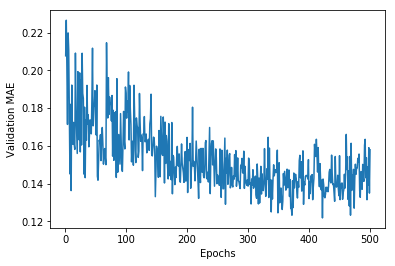

In [192]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

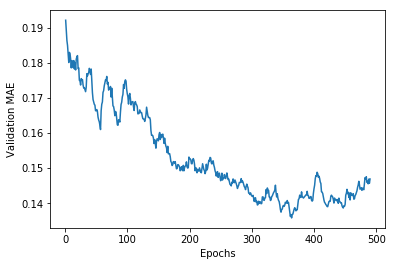

In [193]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [103]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=350, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)


4/4 [==============================] - 2s 446ms/step


In [104]:
test_mae_score

0.3515316843986511

In [56]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


Instructions for updating:
Use tf.cast instead.
Epoch 1/1
 - 3s - loss: 0.1241


In [59]:
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [68]:
X_test.shape

(32, 66, 1)

In [61]:
closing_price

array([[-0.01883256],
       [-0.01451773],
       [-0.02202526],
       [-0.01609451],
       [ 0.02140378],
       [-0.01338538],
       [-0.0158553 ],
       [-0.01755404],
       [-0.01826574],
       [-0.01654363],
       [-0.01990165],
       [-0.01153719],
       [-0.01532416],
       [-0.01924205],
       [-0.02658634],
       [-0.01720296],
       [-0.01008006],
       [ 0.00921216],
       [ 0.00388581],
       [ 0.01295887],
       [ 0.0184966 ],
       [ 0.01441005],
       [-0.00729515],
       [ 0.00420687],
       [ 0.01450097],
       [ 0.00068078],
       [-0.00863087],
       [ 0.01441225],
       [ 0.01988488],
       [ 0.00620365],
       [ 0.0080451 ],
       [ 0.02130242]], dtype=float32)

In [66]:
dataset[32:,-1]

array([ 0.18303826,  0.2373007 , -0.12144623,  0.09313414])

In [64]:
rms=np.sqrt(np.mean(np.power((valid[-1]-closing_price),2)))
rms

2020553174.3090613

In [ ]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


In [ ]:
import numpy as np

k = 4
num_val_samples = len(train) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mse)



In [ ]:
all_scores

In [ ]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
x_train = np.reshape(x_train.shape[0],x_train.shape[1],1) 

In [ ]:
x_train = np.reshape(x_train.shape[0],x_train.shape[1],1) 

In [ ]:
x_train.shape[0]

In [ ]:
x_train.shape[1]

In [ ]:
from sklearn.preprocessing import scale

# Remove unimportant features (weekdays)
train_features = train_features.iloc[:, :-4]
test_features = test_features.iloc[:, :-4]

# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)